In [1]:
import scipy.integrate as spi
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt

In [3]:

nlines=11
rainbow=cmap=plt.get_cmap('rainbow')
line_colors = cmap(np.linspace(0,1,nlines))
greys=plt.get_cmap('Greys')
line_colors2=greys(np.linspace(0,1,nlines))
greens=plt.get_cmap('Greens')
line_colors3=greens(np.linspace(0,1,nlines))
oranges=plt.get_cmap('Oranges')
line_colors4=oranges(np.linspace(0,1,nlines))
blues=plt.get_cmap('Blues')
line_colors5=blues(np.linspace(0,1,nlines))

In [183]:
def SEIS_3_mut(INP,t):  

    Y=np.zeros((18))
    V = INP   
    #susceptible hosts
    N=np.zeros(3)
    for i in range(3):
        N[i]=V[i]+V[i+3]+V[i+6]+V[i+9]
    
    p=(N[1]+2*N[2])/(2*np.sum(N))
    B=np.zeros(3)
    B[0]=(1-p)**2
    B[1]=2*p*(1-p)
    B[2]=p**2
    
    #susceptible hosts AA,AC,CC
    for i in range(3):
        Y[i]=B[i]*nu[0]*(np.sum(N))*(K-np.sum(N))/K - V[i] * (r/1e3) * (beta[0][1]*V[15]) - d[0] * V[i] + delta[i]*V[i+12]
        
    #exposed hosts AA,AC,CC
    for i in range(3):
        Y[i+3]=V[i] * (r/1e3)* (beta[0][1]*V[15])-sigma[0]*V[i+3]- d[0]*V[i+3]
        
    #infectious hosts AA,AC,CC
    for i in range(3):
        Y[i+6]=sigma[0]*V[i+3] - gamma[i] * V[i+6] - d[0] * V[i+6]     -mu[i]*V[i+6]
    
    for i in range(3):
        Y[i+9]=gamma[i] * V[i+6] -omega[i]*V[i+9] -d[0]*V[i+9]
    
    #recovered hosts AA,AC,CC
    for i in range(3):
        Y[i+12]=omega[i] * V[i+9] - delta[i]*V[i+12] -d[0]*V[i+12]
    
    
    #Mosquitos
    Y[15]=nu[1] - (V[15] * (r/1e3) * (beta[1][0]*(V[6]+ V[7]+ V[8]+V[9]+V[10]+V[11]) )) - d[1] * V[15]
    
    Y[16]=(V[15] * (r/1e3) * (beta[1][0]*(V[6]+ V[7]+ V[8]+V[9]+V[10]+V[11])))-sigma[1]*V[16]- d[1]*V[16]
    
    Y[17] = sigma[1]*V[16] - d[1] * V[17]
    

    
    return Y

In [184]:
all_freq=0.1
#=np.linspace(0.01,0.3,5)
Num=1e3
AC=(all_freq)*(1-all_freq)*2*Num
CC=(all_freq)*(all_freq)*Num
N=100000
m_recov=1/np.linspace(1/0.0037,1/0.00185,11)
RES_5=np.zeros((N+1,18,11,11))

r=0.5;


beta=np.array([[0.02,0.02, 0.02], [0.5,0.5, 0.5]]);
sigma=np.array([0.1,0.143])
d=np.array([9e-5, 0.1]);
nu=np.array([1.2e-4, 1e3]);
gamma=np.array([0.047, 0.047,0.047]);
#c=3e-6
cost=np.linspace(1.5e-6,1.2e-5,11)

#mu=np.array([c,0.83*c,0.27*c])
delta=np.array([1.0,1.0,1.0])
K=1e4
for j in range(11):
    omega=np.array([0.0037, m_recov[j],m_recov[j]]);
    for i in range(11):

        het=AC
        hom=CC
        
        mu=np.array([cost[i],0.83*cost[i],0.27*cost[i]])
        X0=np.array([1e3-het-hom,het, hom,0,0,0,1,0, 0,0,0,0,0,0,0]);
        Y0=np.array([1e4,0,1]);
        ND=MaxTime=100000.0;
        TS=1.0
        #alpha=1.0
        INPUT=np.hstack((X0,Y0))

        t_start = 0.0; t_end = ND; t_inc = TS
        t_range = np.arange(t_start, t_end+t_inc, t_inc)
        RES_mut = spi.odeint(SEIS_3_mut,INPUT,t_range)
        RES_5[:,:,i,j]=RES_mut

In [157]:
1/(2*9*30)

0.001851851851851852

In [167]:
1/(30*365)

9.132420091324201e-05

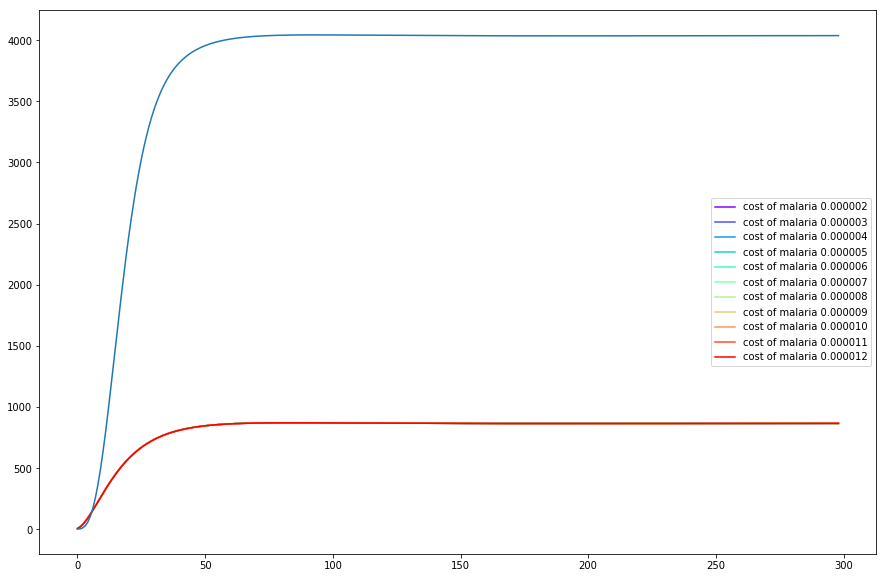

In [186]:
plt.figure(figsize=(15,10))
infect_all=np.zeros((11,11,N+1))
infect_m=np.zeros((11,11,N+1))
for i in range(11):
    for j in range(11):
        for k in range(N+1):
            infect_all[i,j,k]=np.sum(RES_5[k,6:11,i,j])    
            infect_m[i,j,k]=RES_5[k,17,i,j]
            
for i in range(11):
    plt.plot(infect_all[i,0,1:300],c=line_colors[i],label="cost of malaria {0:2f}".format(cost[i]))
    plt.plot(infect_m[i,0,1:300])
plt.legend()
plt.show()

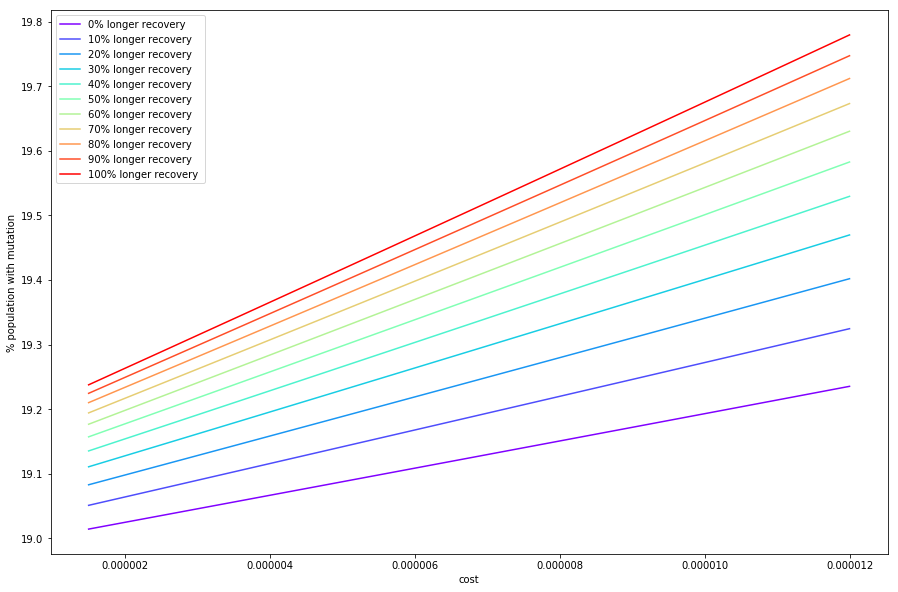

In [188]:
Z=RES_5[100000,1,:,:]+RES_5[100000,2,:,:]+RES_5[100000,4,:,:]+RES_5[100000,5,:,:]+RES_5[100000,7,:,:]+RES_5[100000,8,:,:]+RES_5[100000,10,:,:]+RES_5[100000,11,:,:]+RES_5[100000,13,:,:]+RES_5[100000,14,:,:]

pop=np.zeros((11,11))
for i in range(11):
    for j in range(11):
        pop[i,j]=np.sum(RES_5[100000,0:14,i,j])
AC_=RES_5[100000,1,:,:]+RES_5[100000,4,:,:]+RES_5[100000,7,:,:]+RES_5[100000,10,:,:]+RES_5[100000,11,:,:]

CC_= RES_5[100000,2,:,:]+ RES_5[100000,5,:,:]+RES_5[100000,8,:,:]+RES_5[100000,11,:,:]
freq=(AC_+2*CC)/(pop)
plt.figure(figsize=(15,10))
for i in range(11):
    plt.plot(cost,100*Z[:,i]/pop[:,i],c=line_colors[i],label='{0:.0f}% longer recovery '.format(diff_recov[i]))
    #plt.plot(cost,freq[:,i],c=line_colors3[i])
# /pop[:,i]
diff_recov=100*((1/m_recov)-(1/m_recov[0]))/(1/m_recov[0])
plt.legend()
plt.ylabel('% population with mutation')
plt.xlabel('cost of malaria')

plt.show()

In [190]:
diff_recov=100*((1/m_recov)-(1/m_recov[0]))/(1/m_recov[0])
diff_recov

array([   0.,   10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,
         90.,  100.])

/home/susanna/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


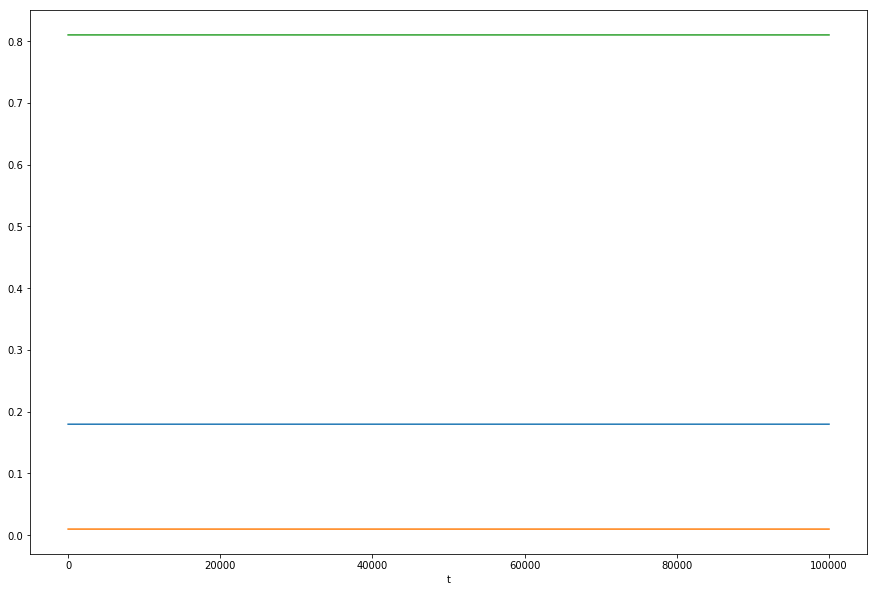

In [170]:
plt.figure(figsize=(15,10))
pop_t=np.zeros(100001)
pop_t_10=np.zeros(100001)
AC=np.zeros(100001)
CC=np.zeros(100001)
AA=np.zeros(100001)
for i in range(100001):
    pop_t[i]=np.sum(RES_5[i,0:14,0,0])
    pop_t_10[i]=np.sum(RES_5[i,0:14,10,0])
    AC[i]=RES_5[i,1,10,0]+RES_5[i,4,10,0]+RES_5[i,7,10,0]+RES_5[i,10,10,0]+RES_5[i,13,10,0]
    CC[i]=RES_5[i,2,10,0]+RES_5[i,5,10,0]+RES_5[i,8,10,0]+RES_5[i,11,10,0]+RES_5[i,14,10,0]
    AA[i]=RES_5[i,0,10,0]+RES_5[i,3,10,0]+RES_5[i,6,10,0]+RES_5[i,9,10,0]+RES_5[i,12,10,0]
#plt.plot(pop_t)
#plt.plot(pop_t_10,label="high cost")
plt.plot(AC/pop_t_10)
plt.plot(CC/pop_t_10)
plt.plot(AA/pop_t_10)
# /pop[:,i]
plt.legend()
plt.ylabel('')
plt.xlabel('t')

plt.show()

In [66]:
(AC[-1]+2*CC[-1])/(2*pop_t[-1])

0.059431314973514296

In [81]:
cost

array([  3.00000000e-06,   3.90000000e-06,   4.80000000e-06,
         5.70000000e-06,   6.60000000e-06,   7.50000000e-06,
         8.40000000e-06,   9.30000000e-06,   1.02000000e-05,
         1.11000000e-05,   1.20000000e-05])

In [42]:
diff_recov=100*((1/m_recov)-(1/0.033))/(1/0.033)

In [74]:
pop[:,0]

array([ 14647.29935639,  14617.17178462,  14587.08709302,  14557.04590852,
        14527.04775299,  14497.0928741 ,  14467.18125029,  14437.31306378,
        14407.48842637,  14377.70756347,  14347.97050582])

In [22]:
Z[:,i]/10

array([ 86.98425955,  86.30707421,  85.6338766 ,  84.9646433 ,
        84.29935934,  83.63800763,  82.98056358,  82.32701745,
        81.67734584,  81.03153169,  80.38956116])

In [53]:
pop[:,1]

array([ 14647.16861249,  14617.02933983,  14586.93345952,  14556.88105707,
        14526.87216334,  14496.90690959,  14466.98501233,  14437.10695435,
        14407.27292536,  14377.48288099,  14347.73711378])

In [27]:
all_freq=np.linspace(0.01,0.3,5)
Num=1e3
AC=(all_freq)*(1-all_freq)*2*Num
CC=(all_freq)*(all_freq)*Num
N=1000000
RES_m=np.zeros((N+1,15,5))

r=0.5;

beta=np.array([[0.02,0.02, 0.02], [0.5,0.5, 0.5]]);
sigma=np.array([0.1,0.143])
d=np.array([6e-5, 0.1]);
nu=np.array([1.2e-4, 1e3]);
gamma=np.array([0.033, 0.0165,0.0165]);
c=3e-6

mu=np.array([c,0.83*c,0.27*c])
delta=np.array([1.0,1.0,1.0])
K=1e4

for i in range(5):
    
    het=AC[i]
    hom=CC[i]
    
    X0=np.array([1e3-het-hom,het, hom,0,0,0,1,0, 0,0,0,0]);
    Y0=np.array([1e4,0,1]);
    ND=MaxTime=1000000.0;
    TS=1.0
    #alpha=1.0
    INPUT=np.hstack((X0,Y0))
  
    t_start = 0.0; t_end = ND; t_inc = TS
    t_range = np.arange(t_start, t_end+t_inc, t_inc)
    RES_mut = spi.odeint(SEIS_3_mut,INPUT,t_range)
    RES_m[:,:,i]=RES_mut

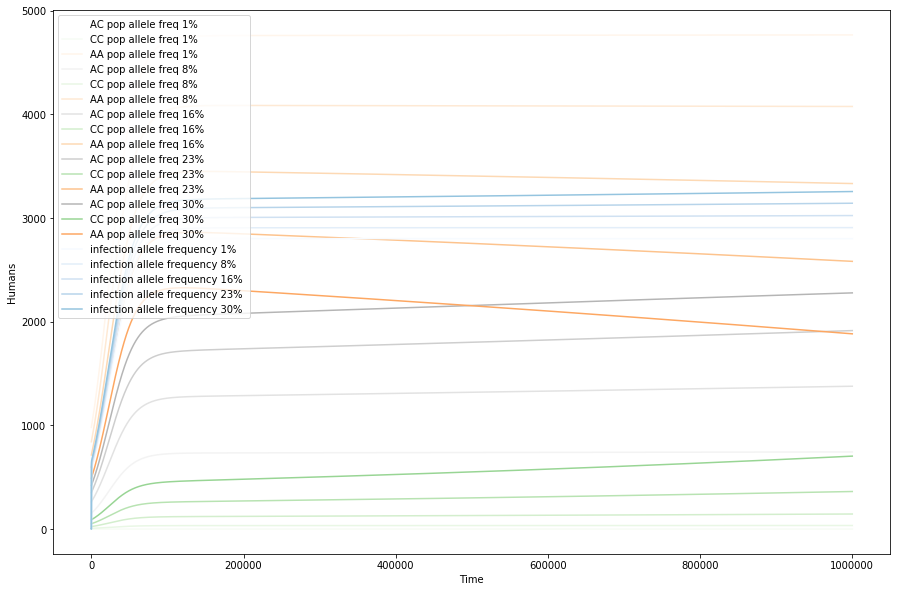

In [28]:
plt.figure(figsize=(15,10))
#for i in range(5):
   # plt.plot(RES_m[:,6,i]+RES_m[:,7,i]+RES_m[:,8,i], c=line_colors[i], label='infection allele frequency {0:.0f}% '.format(all_freq[i]*100))
    #plt.plot(RES_m[:,1,i]+RES_m[:,7,i], c=line_colors2[i], label='population with mutation{0:.0f} %'.format(m[i]/10))
    #plt.plot(RES_m[:,0,i]+RES_m[:,1,i]+RES_m[:,3,i]+RES_m[:,4,i]+RES_m[:,6,i]+RES_m[:,7,i], c=line_colors2[i], label='population with mutation{0:.0f} %'.format(m[i]/10))
for i in range(5):
    pop_AA=np.zeros((1000001,5))
    pop_AC=np.zeros((1000001,5))
    pop_CC=np.zeros((1000001,5))
    pop=np.zeros((1000001,5))
    pop_AA[:,i]=RES_m[:,0,i]+RES_m[:,3,i]+RES_m[:,6,i]+RES_m[:,9,i]
    pop_AC[:,i]=RES_m[:,1,i]+RES_m[:,4,i]+RES_m[:,7,i]+RES_m[:,10,i]
    pop_CC[:,i]=RES_m[:,2,i]+RES_m[:,5,i]+RES_m[:,8,i]+RES_m[:,11,i]
    pop[:,i]=pop_AA[:,i]+pop_AC[:,i]+pop_CC[:,i]

    plt.plot(pop_AC[:,i],c=line_colors2[i],label='AC pop allele freq {0:.0f}%'.format(all_freq[i]*100))  

    plt.plot(pop_CC[:,i],c=line_colors3[i],label='CC pop allele freq {0:.0f}%'.format(all_freq[i]*100)) 
    

    plt.plot(pop_AA[:,i],c=line_colors4[i],label='AA pop allele freq {0:.0f}%'.format(all_freq[i]*100))
for i in range(5):
    plt.plot((RES_m[:,6,i]+RES_m[:,7,i]+RES_m[:,8,i]), c=line_colors5[i], label='infection allele frequency {0:.0f}% '.format(all_freq[i]*100))

plt.xlabel('Time')
plt.ylabel('Humans')
#plt.title('Overall human infection level with altered recovery time SEIS-SEI model')
plt.legend()
plt.show()

In [46]:
100000/365

273.972602739726

# COMPETITION

In [98]:
def SEIS_mut_comp(INP,t):  
    traits=2
    eq=traits*2*4+4+3
    Y=np.zeros((eq))
    V = INP   
    #susceptible hosts
    N=np.zeros(5)
    for i in range(5):
        N[i]=V[i]+V[i+5]+V[i+10]+V[i+15]
    
    p1=(N[1]+2*N[2])/(2*np.sum(N))
    p2=(N[3]+2*N[4])/(2*np.sum(N))
    B=np.zeros(5)
    B[0]=(1-p1-p2)**2
    B[1]=2*p1*(1-p1-p2)
    B[2]=p1**2
    B[3]=2*p2*(1-p1-p2)
    B[4]=p2**2
    #susceptible hosts AA,AC,CC,AM,MM
    for i in range(5):
        Y[i]=B[i]*nu[0]*(np.sum(N))*(K-np.sum(N))/K - V[i] * (r/1e3) * (beta[0][1]*V[eq-1]) - d[0] * V[i] + delta[i]*V[i+15]
        
    #exposed hosts AA,AC,CC,AM,MM
    for i in range(5):
        Y[i+5]=V[i] * (r/1e3)* (beta[0][1]*V[eq-1])-sigma[0]*V[i+5]- d[0]*V[i+5]
        
    #infectious hosts AA,AC,CC,AM,MM
    for i in range(5):
        Y[i+10]=sigma[0]*V[i+5] - gamma[i] * V[i+10] - d[0] * V[i+10]     -mu[i]*V[i+10]
    
    
    #recovered hosts AA,AC,CC,AM,MM
    for i in range(5):
        Y[i+15]=gamma[i] * V[i+10] - delta[i]*V[i+15] -d[0]*V[i+15]
    
    
    #Mosquitos
    Y[eq-3]=nu[1] - (V[eq-3] * (r/1e3) * (beta[1][0]*(V[10]+V[11]+ V[12]+V[13]+V[14]) )) - d[1] * V[eq-3]
    
    Y[eq-2]=V[eq-3] * (r/1e3) * (beta[1][0]*(V[10]+V[11]+ V[12]+V[13]+V[14]) )-sigma[1]*V[eq-2]- d[1]*V[eq-2]
    
    Y[eq-1] = sigma[1]*V[eq-2] - d[1] * V[eq-1]
    

    
    return Y

In [134]:
all_freq=0.01
all_freq2=0.3
Num=1e3
AC=(all_freq)*(1-all_freq-all_freq2)*2*Num
CC=(all_freq)*(all_freq)*Num
AM=(all_freq2)*(1-all_freq-all_freq2)*2*Num
MM=(all_freq2)*(all_freq2)*Num
N=1000000
RES_comp=np.zeros((N+1,23))

r=0.5;

beta=np.array([[0.02,0.02, 0.02], [0.5,0.5, 0.5]]);
sigma=np.array([0.1,0.143])
d=np.array([6e-5, 0.1]);
nu=np.array([1.2e-4, 1e3]);
gamma=np.array([0.033, 0.0165,0.0165,0.0165,0.0165]);
c=3e-6

mu=np.array([c,0.83*c,0.27*c,0.1*c,0.05*c])
delta=np.array([1.0,1.0,1.0,1.0,1.0])
K=1e4


    

    
X0=np.array([1e3-AC-CC-AM-MM,AC,CC,AM,MM,0,0,0,0,0,1,0, 0,0,0,0,0,0,0,0]);
Y0=np.array([1e4,0,1]);
ND=MaxTime=1000000.0;
TS=1.0

INPUT=np.hstack((X0,Y0))
  
t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES_mut = spi.odeint(SEIS_mut_comp,INPUT,t_range)
RES_comp[:,:]=RES_mut

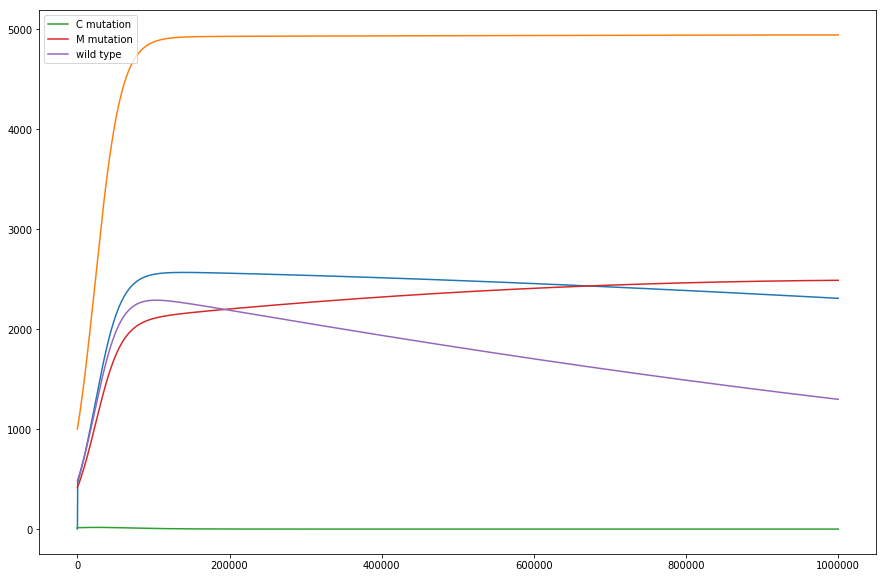

In [135]:
plt.figure(figsize=(15,10))
infect=np.zeros(N+1)
pop=np.zeros(N+1)
C_mut=np.zeros(N+1)
M_mut=np.zeros(N+1)
wild_type=np.zeros(N+1)
for i in range(N+1):
    infect[i]=np.sum(RES_comp[i,10:14])
    pop[i]=np.sum(RES_comp[i,0:19])
    wild_type[i]=RES_comp[i,0]+RES_comp[i,5]+RES_comp[i,10]+RES_comp[i,15]
    C_mut[i]=np.sum(RES_comp[i,1:2])+np.sum(RES_comp[i,6:7])+np.sum(RES_comp[i,11:12])+np.sum(RES_comp[i,16:17])
    M_mut[i]=np.sum(RES_comp[i,3:4])+np.sum(RES_comp[i,8:9])+np.sum(RES_comp[i,13:14])+np.sum(RES_comp[i,18:19])
plt.plot(infect)
plt.plot(pop)
plt.plot(C_mut,label="C mutation")
plt.plot(M_mut,label="M mutation")
plt.plot(wild_type,label="wild type")
plt.legend()

plt.show()

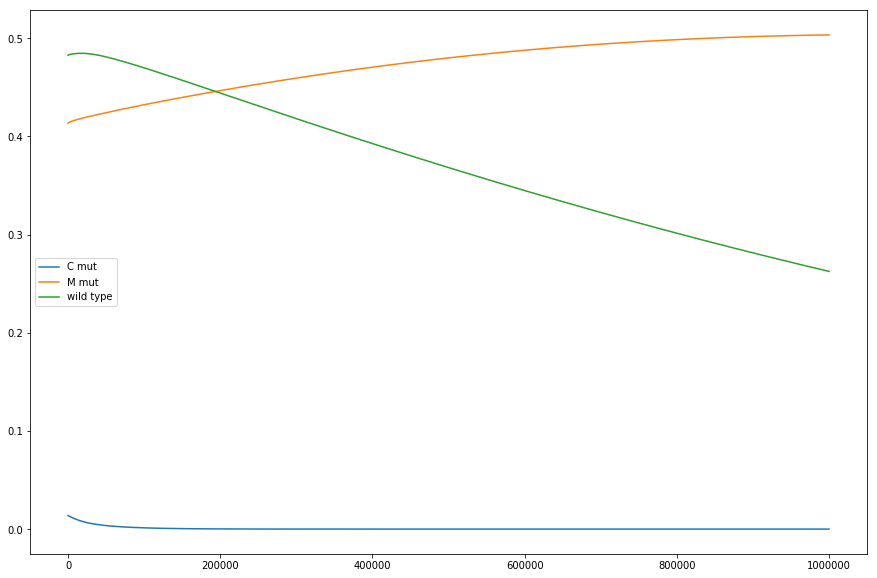

In [136]:
plt.figure(figsize=(15,10))

plt.plot(C_mut/pop,label="C mut")
plt.plot(M_mut/pop, label="M mut")
plt.plot(wild_type/pop,label="wild type")
plt.legend()
plt.show()

2739.72602739726